# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [11]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [12]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

621

In [85]:
weather = []
city = "noumea"
url = "http://api.openweathermap.org/data/2.5/weather?"
unit = "imperial"
query_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=" + unit
response = requests.get(query_url).json()
response
#         lat = response['coord']['lat']
#         lng = response['coord']['lon']
#         temp_max = response['main']['temp_max']
#         humid = response['main']['humidity']
#         cloud = response ['clouds']['all']
#         date = response['dt']
#         wind = response['wind']['speed']
#         country = response['sys']['country']
#         dict = {'City': city,'Lat': lat, 'Lng': lng, 'Max Temp': temp_max, 'Humidity' : humid, 'Cloudiness' : cloud, 'Date':date, \
#                 'Wind Speed' : wind, 'Country':country}
#         weather.append(dict)

{'coord': {'lon': 166.4572, 'lat': -22.2763},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04d'}],
 'base': 'stations',
 'main': {'temp': 83.44,
  'feels_like': 86.14,
  'temp_min': 82.99,
  'temp_max': 84.2,
  'pressure': 1013,
  'humidity': 58},
 'visibility': 10000,
 'wind': {'speed': 9.22, 'deg': 20},
 'clouds': {'all': 90},
 'dt': 1620789734,
 'sys': {'type': 1,
  'id': 7344,
  'country': 'NC',
  'sunrise': 1620760650,
  'sunset': 1620800620},
 'timezone': 39600,
 'id': 2139521,
 'name': 'Noumea',
 'cod': 200}

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [14]:
# do it once
# then do it for 3 cities - make sure its works
# #add time sleep because API only allows 60 calls/minute
# #then do it for all cities

weather = []
unit = "imperial"

x = 1
y = 1
z = 0
print(f"Beginning Data Retrieval")
for city in cities:
    print(f"Processing Record {x} of Set {y} | {city}")
    url = "http://api.openweathermap.org/data/2.5/weather?"
    city = city
    query_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=" + unit
    try:
        response = requests.get(query_url).json()
        lat = response['coord']['lat']
        lng = response['coord']['lon']
        temp_max = response['main']['temp_max']
        humid = response['main']['humidity']
        cloud = response ['clouds']['all']
        date = response['dt']
        wind = response['wind']['speed']
        country = response['sys']['country']
        dict = {'City': city,'Lat': lat, 'Lng': lng, 'Max Temp': temp_max, 'Humidity' : humid, 'Cloudiness' : cloud, 'Date':date, \
                'Wind Speed' : wind, 'Country':country}
        weather.append(dict)
    except KeyError:
        print(f"There was a Key Error")
        z = z+1
        
    x += 1
    if x % 60 == 0:
        time.sleep(60)
        y +=1
print(f"There were {z} keyErrors")

Beginning Data Retrieval
Processing Record 1 of Set 1 | dikson
Processing Record 2 of Set 1 | cape town
Processing Record 3 of Set 1 | bredasdorp
Processing Record 4 of Set 1 | mahebourg
Processing Record 5 of Set 1 | diffa
Processing Record 6 of Set 1 | hilo
Processing Record 7 of Set 1 | rikitea
Processing Record 8 of Set 1 | grindavik
Processing Record 9 of Set 1 | port alfred
Processing Record 10 of Set 1 | cayenne
Processing Record 11 of Set 1 | taolanaro
There was a Key Error
Processing Record 12 of Set 1 | ust-kulom
Processing Record 13 of Set 1 | saint-philippe
Processing Record 14 of Set 1 | mackay
Processing Record 15 of Set 1 | torbay
Processing Record 16 of Set 1 | geraldton
Processing Record 17 of Set 1 | aflu
There was a Key Error
Processing Record 18 of Set 1 | vaini
Processing Record 19 of Set 1 | byron bay
Processing Record 20 of Set 1 | saint george
Processing Record 21 of Set 1 | jamestown
Processing Record 22 of Set 1 | ushuaia
Processing Record 23 of Set 1 | slave 

Processing Record 187 of Set 4 | severo-kurilsk
Processing Record 188 of Set 4 | sorvag
There was a Key Error
Processing Record 189 of Set 4 | khatanga
Processing Record 190 of Set 4 | kodiak
Processing Record 191 of Set 4 | saskylakh
Processing Record 192 of Set 4 | monkey bay
Processing Record 193 of Set 4 | lincoln
Processing Record 194 of Set 4 | bandarbeyla
Processing Record 195 of Set 4 | kedrovyy
Processing Record 196 of Set 4 | sanghar
Processing Record 197 of Set 4 | albany
Processing Record 198 of Set 4 | champerico
Processing Record 199 of Set 4 | norman wells
Processing Record 200 of Set 4 | rocha
Processing Record 201 of Set 4 | eskasem
There was a Key Error
Processing Record 202 of Set 4 | iquique
Processing Record 203 of Set 4 | banda aceh
Processing Record 204 of Set 4 | gangapur
Processing Record 205 of Set 4 | rio grande
Processing Record 206 of Set 4 | kanniyakumari
Processing Record 207 of Set 4 | satitoa
There was a Key Error
Processing Record 208 of Set 4 | haapit

Processing Record 375 of Set 7 | asyut
Processing Record 376 of Set 7 | carlsbad
Processing Record 377 of Set 7 | itarema
Processing Record 378 of Set 7 | dawlatabad
Processing Record 379 of Set 7 | beyneu
Processing Record 380 of Set 7 | coihaique
Processing Record 381 of Set 7 | altus
Processing Record 382 of Set 7 | platanos
Processing Record 383 of Set 7 | chhuikhadan
Processing Record 384 of Set 7 | sentyabrskiy
There was a Key Error
Processing Record 385 of Set 7 | halalo
There was a Key Error
Processing Record 386 of Set 7 | ilulissat
Processing Record 387 of Set 7 | umm kaddadah
Processing Record 388 of Set 7 | ligourion
Processing Record 389 of Set 7 | maceio
Processing Record 390 of Set 7 | huangcun
Processing Record 391 of Set 7 | wulanhaote
There was a Key Error
Processing Record 392 of Set 7 | kieta
Processing Record 393 of Set 7 | west wendover
Processing Record 394 of Set 7 | carnarvon
Processing Record 395 of Set 7 | havoysund
Processing Record 396 of Set 7 | saquena
Pr

Processing Record 565 of Set 10 | kaspiysk
Processing Record 566 of Set 10 | verkhnevilyuysk
Processing Record 567 of Set 10 | lere
Processing Record 568 of Set 10 | high level
Processing Record 569 of Set 10 | paamiut
Processing Record 570 of Set 10 | isangel
Processing Record 571 of Set 10 | fare
Processing Record 572 of Set 10 | noumea
Processing Record 573 of Set 10 | vostok
Processing Record 574 of Set 10 | touros
Processing Record 575 of Set 10 | khandyga
Processing Record 576 of Set 10 | aklavik
Processing Record 577 of Set 10 | barroualie
There was a Key Error
Processing Record 578 of Set 10 | zakamensk
Processing Record 579 of Set 10 | luderitz
Processing Record 580 of Set 10 | vanavara
Processing Record 581 of Set 10 | waipawa
Processing Record 582 of Set 10 | palimbang
Processing Record 583 of Set 10 | talnakh
Processing Record 584 of Set 10 | swakopmund
Processing Record 585 of Set 10 | ambovombe
Processing Record 586 of Set 10 | mrirt
There was a Key Error
Processing Recor

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [90]:
weather_df = pd.DataFrame(weather)
weather_df.dropna()
weather_df.to_csv('weather_output.csv', index = False)
weather_df

""


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [5]:
# weather_columns = weather_df.columns
# weather_stat = []
# for columns in weather_columns:
#     stat = weather_df.agg({columns: ["mean", "median", "sem", "var", "std"]})
#     weather_stat.append(stat)

# weather_stat
# aggr = clean_df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean", "median", "sem", "var", "std"]})

# aggr.columns = ["Tumor Vol Mean", "Tumor Vol Median", "Tumor Vol SEM", "Tumor Vol Variance", "Tumor Vol Standard Deviation"]


In [82]:
quartiles = weather_df["Lat"].quantile([.25])
lower_bound = quartiles[.25]
lower_bound

stat_df["City"] = ''
stat_df["Lat"] = ''
stat_df["Lng"] = ''
stat_df["Max Temp"] = ''
stat_df["Humidity"] = ''
stat_df["Cloudiness"] = ''
stat_df["Date"] = ''
stat_df["Windspeed"] = ''
stat_df["Country"] = ''




# Iterate over column names
for column in weather_df:
      
    # Select column contents by column
    # name using [] operator
    columnSeriesObj = weather_df[column]
    data = weather_df.agg({column: ["count","mean", "median", "sem", "var", "std", "min", "max", "quantile"]})
    stat.append(data)
    
# stat = pd.DataFrame(stat)
# stat[1]
df = pd.DataFrame(stat,columns=['City', 'Lat', 'Lng', 'Max Temp', 'Humidity','Cloudiness', 'Date', 'Wind Speed', 'Country'])
df



ValueError: Shape of passed values is (45, 1), indices imply (45, 9)

In [7]:
#  Get the indices of cities that have humidity over 100%.
humid_over100 = weather_df.loc[weather_df["Humidity"]>100]
humid_over100

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Date,Wind Speed,Country


In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [52]:
today = pd.to_datetime("today").strftime("%m/%d/%Y")
today

'05/11/2021'

## Latitude vs. Temperature Plot

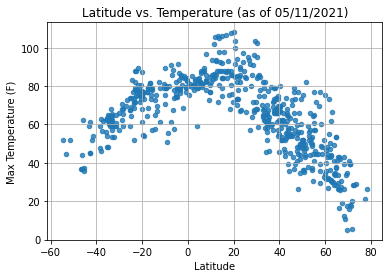

In [53]:
weather_df.plot(x ='Lat', y='Max Temp', kind = 'scatter', grid = True, alpha = .8)
plt.title(f"Latitude vs. Temperature (as of {today})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.show()

## Latitude vs. Humidity Plot

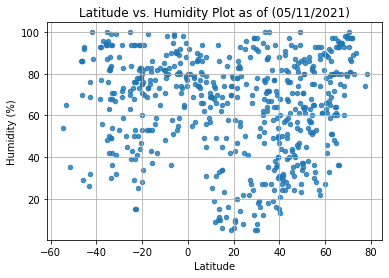

In [54]:
weather_df.plot(x ='Lat', y='Humidity', kind = 'scatter', grid = True, alpha = .8)
plt.title(f"Latitude vs. Humidity Plot as of ({today})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.show()

## Latitude vs. Cloudiness Plot

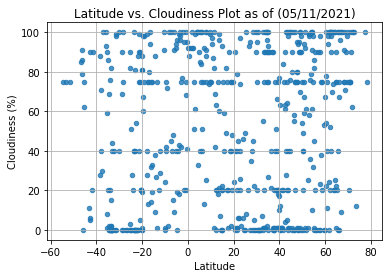

In [55]:
weather_df.plot(x ='Lat', y='Cloudiness', kind = 'scatter', grid = True, alpha = .8)
plt.title(f"Latitude vs. Cloudiness Plot as of ({today})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.show()

## Latitude vs. Wind Speed Plot

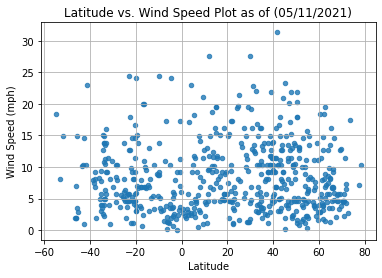

In [56]:
weather_df.plot(x ='Lat', y='Wind Speed', kind = 'scatter', grid = True, alpha = .8)
plt.title(f"Latitude vs. Wind Speed Plot as of ({today})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.show()

## Linear Regression

In [21]:
n_hem = weather_df.loc[weather_df["Lat"] >= 0, 'Lat']
s_hem = weather_df.loc[weather_df["Lat"] < 0, 'Lat']
n_hem_temp =  weather_df.loc[weather_df["Lat"] >= 0,'Max Temp']
s_hem_temp =  weather_df.loc[weather_df["Lat"] < 0,'Max Temp']
n_hem_hum =  weather_df.loc[weather_df["Lat"] >= 0,'Humidity']
s_hem_hum =  weather_df.loc[weather_df["Lat"] < 0,'Humidity']
n_hem_cloud =  weather_df.loc[weather_df["Lat"] >= 0,'Cloudiness']
s_hem_cloud =  weather_df.loc[weather_df["Lat"] < 0,'Cloudiness']
n_hem_wind =  weather_df.loc[weather_df["Lat"] >= 0,'Wind Speed']
s_hem_wind =  weather_df.loc[weather_df["Lat"] < 0,'Wind Speed']



####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

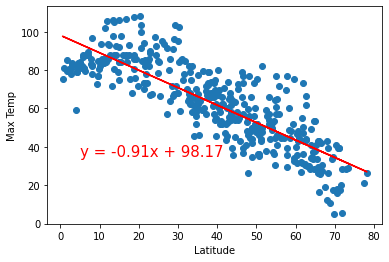

the r-value is -0.8321238400600168


In [26]:
x_values = n_hem
y_values = n_hem_temp
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5,35),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()
print(f"the r-value is {rvalue}")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

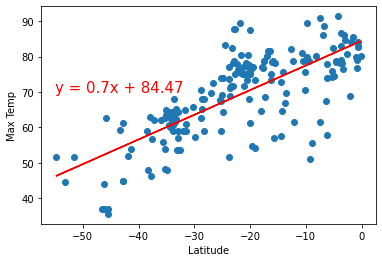

the r-value is 0.7424579416348155


In [32]:
x_values = s_hem
y_values = s_hem_temp
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,70),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()
print(f"the r-value is {rvalue}")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

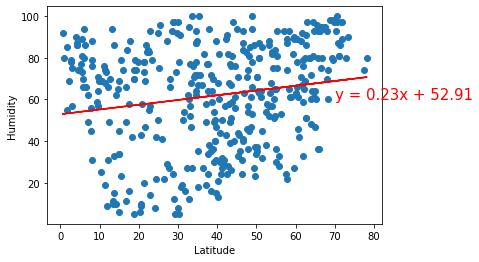

the r-value is 0.17957089386441596


In [36]:
x_values = n_hem
y_values = n_hem_hum
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(70,60),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()
print(f"the r-value is {rvalue}")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

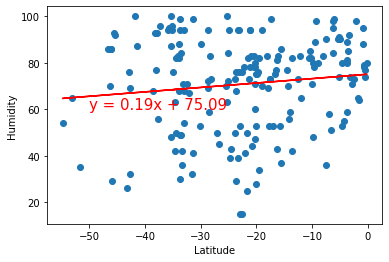

the r-value is 0.12262730268362862


In [39]:
x_values = s_hem
y_values = s_hem_hum
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,60),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()
print(f"the r-value is {rvalue}")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

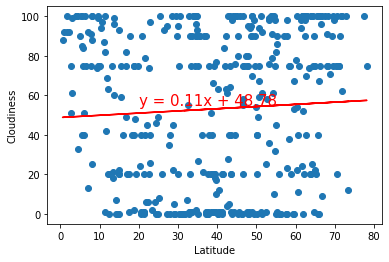

the r-value is 0.056535333185576325


In [41]:
x_values = n_hem
y_values = n_hem_cloud
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,55),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()
print(f"the r-value is {rvalue}")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

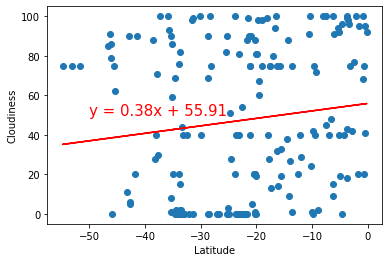

the r-value is 0.1307730469441416


In [43]:
x_values = s_hem
y_values = s_hem_cloud
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()
print(f"the r-value is {rvalue}")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

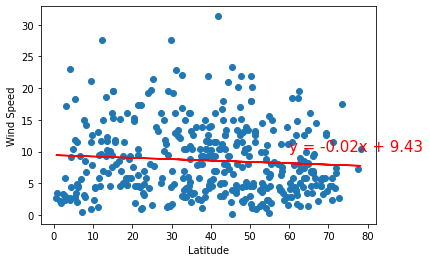

the r-value is -0.07566763222227708


In [45]:
x_values = n_hem
y_values = n_hem_wind
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(60, 10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()
print(f"the r-value is {rvalue}")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

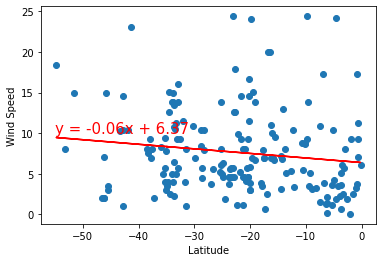

the r-value is -0.14091218231195676


In [50]:
x_values = s_hem
y_values = s_hem_wind
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55, 10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()
print(f"the r-value is {rvalue}")